In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
csv_path = r"file:/databricks/driver/PredictionData/PredictionData.csv"
data_frame = pd.read_csv(csv_path, index_col=0)
data_frame.tail(5)

,TimeStamp,IOT Connection ID,ID,County,Device IP,Device Type,Malware Attack Attempt,Recommended Action
24,2023-12-02 16:04:39.309043,CeYEuy4iXpZY1GST62,23,Anoka,181.227.79.205,Smart Fridge,No,No Action
25,2023-12-02 16:04:39.309458,CMsvMk2kq1V7L2J6D,66,Hennepin,174.6.24.255,Echo device,Yes,log user out of echo
26,2023-12-02 16:04:39.310665,Cwx9Wx1VgP62slQHal,84,Anoka,116.230.188.232,Echo device,Yes,log user out of echo
27,2023-12-02 16:04:39.311012,C70eKn2S0Dod9MOBr3,85,Carver,182.193.85.174,Smart Fridge,Yes,Disconnect and message user
28,2023-12-02 16:04:39.311382,C69hsC2TWuh0jbJTq3,44,Wright,254.170.228.64,Smart Fridge,No,No Action


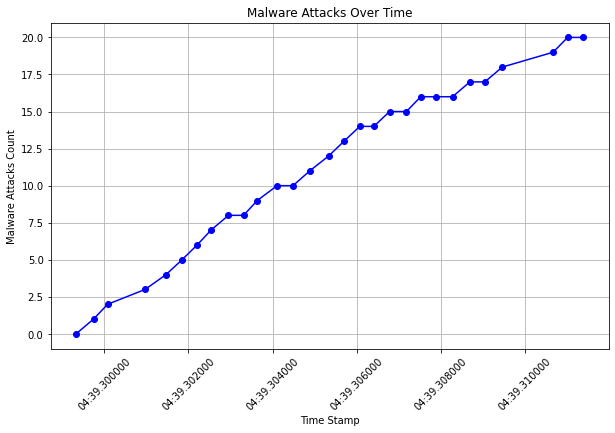

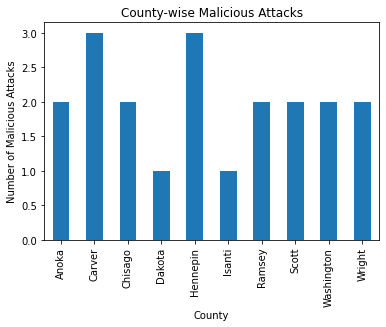

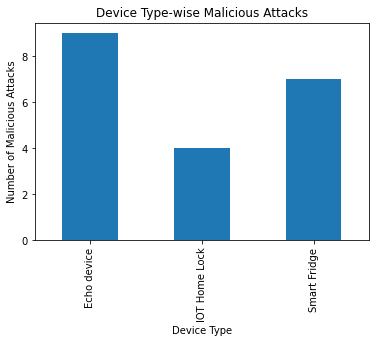

In [0]:


df = data_frame.copy()
# Assuming df is your DataFrame
# Convert 'TimeStamp' column to datetime
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# Sort DataFrame by 'TimeStamp'
df = df.sort_values(by='TimeStamp')

# Create a new column 'MalwareCount' representing the cumulative count of 'Yes' in 'Malware Attack Attempt'
df['MalwareCount'] = df['Malware Attack Attempt'].eq('Yes').cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['TimeStamp'], df['MalwareCount'], marker='o', linestyle='-', color='b')
plt.title('Malware Attacks Over Time')
plt.xlabel('Time Stamp')
plt.ylabel('Malware Attacks Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

df['Malware Attack Attempt'] = df['Malware Attack Attempt'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot county-wise bar graph
county_counts = df.groupby('County')['Malware Attack Attempt'].sum()
county_counts.plot(kind='bar', xlabel='County', ylabel='Number of Malicious Attacks', title='County-wise Malicious Attacks')
plt.show()

# Plot device type-wise bar graph
device_counts = df.groupby('Device Type')['Malware Attack Attempt'].sum()
device_counts.plot(kind='bar', xlabel='Device Type', ylabel='Number of Malicious Attacks', title='Device Type-wise Malicious Attacks')
plt.show()
